In [ ]:
import iris
import cv2
import matplotlib.pyplot as plt

print(iris.__version__)


subject1_first_image = cv2.imread("./example_orb_image_1.png", cv2.IMREAD_GRAYSCALE)
subject1_second_image = cv2.imread("./example_orb_image_2.png", cv2.IMREAD_GRAYSCALE)
subject2_image = cv2.imread("./example_orb_image_3.png", cv2.IMREAD_GRAYSCALE)


# plt.imshow(subject1_first_image, cmap='gray')
# plt.title('Subject 1, image 1')
# plt.show()

# plt.imshow(subject1_second_image, cmap='gray')
# plt.title('Subject 1, image 2')
# plt.show()

# plt.imshow(subject2_image, cmap='gray')
# plt.title('Subject 2, image 1')
# plt.show()

import iris

iris_pipeline = iris.IRISPipeline()

output_1 = iris_pipeline(subject1_first_image, eye_side="left")
subject1_first_code = output_1['iris_template']

output_2 = iris_pipeline(subject1_second_image, eye_side="left")
subject1_second_code = output_2['iris_template']

output_3 = iris_pipeline(subject2_image, eye_side="left")
subject2_code = output_3['iris_template']

# print(subject1_first_code)

c:\Users\user\anaconda3\envs\iris_dev\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.8.2
iris_codes=[array([[[False,  True],
        [ True,  True],
        [ True,  True],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]],

       [[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False,  True],
        ...,
        [ True, False],
        [ True, False],
        [False, False]],

       ...,

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        ...,
        [False,  True],
        [False,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True, False],
        ...,
        [False,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True, False],
        [ True, False],
        ...,
        [ True,  True],
        [ True,  True],
        [ True,  True]]]), array([[[ True

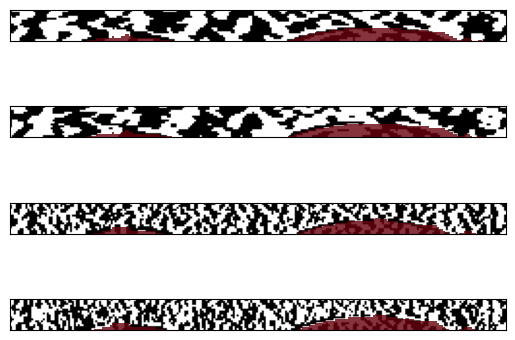

In [2]:
iris_visualizer = iris.visualisation.IRISVisualizer()
canvas = iris_visualizer.plot_iris_template(subject1_first_code)
plt.show()

In [14]:
import numpy as np

iris_ex_array = np.array(subject1_first_code.iris_codes)

In [15]:
iris_ex_array.shape

(2, 16, 256, 2)

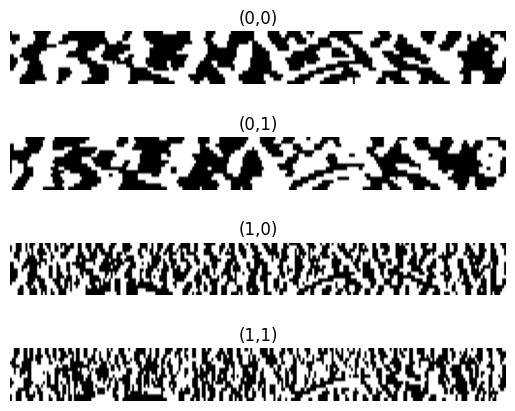

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Example input (replace with your actual data)
data = iris_ex_array

fig, axes = plt.subplots(4, 1)

titles = [
    "(0,0)",
    "(0,1)",
    "(1,0)",
    "(1,1)",
]

# Loop through the 4 combinations
for i, (sample_idx, channel_idx) in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
    image = data[sample_idx, :, :, channel_idx]  # Shape: (16, 256)
    axes[i].imshow(image, cmap="gray", aspect="auto")
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.subplots_adjust(hspace=1)  # Adjust this value to increase/decrease spacing

plt.show()
